<a href="https://colab.research.google.com/github/rajenheg10/aiRepo/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shreenidhihipparagi_google_stock_prediction_path = kagglehub.dataset_download('shreenidhihipparagi/google-stock-prediction')
thebendu_stock_predictor_keras_default_1_path = kagglehub.model_download('thebendu/stock-predictor/Keras/default/1')

print('Data source import complete.')


100%|██████████| 29.3k/29.3k [00:00<00:00, 19.6MB/s]

Extracting files...



  0%|          | 0.00/999k [00:00<?, ?B/s]
100%|██████████| 999k/999k [00:00<00:00, 2.48MB/s]

Data source import complete.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreenidhihipparagi/google-stock-prediction")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/google-stock-prediction


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/kaggle/input/google-stock-prediction/GOOG.csv")
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [5]:
data.shape

(1258, 14)

In [6]:
data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
year1 = data[data['date'] > '2019-01-01']

In [10]:
year1.shape

(616, 14)

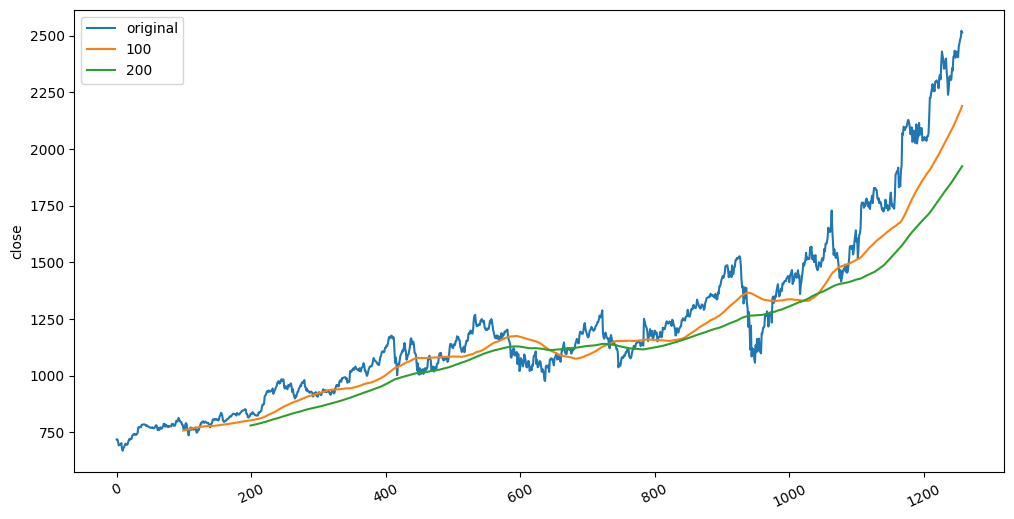

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data['close'], label='original')
sns.lineplot(data['close'].rolling(100).mean(), label='100')
sns.lineplot(data['close'].rolling(200).mean(), label='200')
plt.xticks(rotation = 25)
plt.show()

## Test train split

In [12]:
tn = len(data)*3//5
vn = len(data)//5
train_df = data.iloc[:tn]
test_df = data.iloc[tn:tn+vn]
val_df = data.iloc[tn+vn:]
train_df.shape, test_df.shape, val_df.shape

((754, 14), (251, 14), (253, 14))

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data[['close']].values)

MinMaxScaler()

In [15]:
train_close = scaler.transform(train_df[['close']].values)
test_close = scaler.transform(test_df[['close']].values)
val_close = scaler.transform(val_df[['close']].values)

In [16]:
train_close[:5]

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       [0.01265823],
       [0.01373196]])

In [17]:
def get_x_y(values: np.array, size=100):
  X = []
  y = []
  for i in range(size, len(values)):
    X.append(values[i - size: i])
    y.append(values[i, 0])
  return np.array(X), np.array(y)

In [18]:
size = 100
X_train, y_train = get_x_y(train_close, size)
X_test, y_test = get_x_y(test_close, size)
X_val, y_val = get_x_y(val_close, size)

In [19]:
X_train.shape, y_train.shape

((654, 100, 1), (654,))

## Model Training

In [20]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.losses as losses

import tensorflow.keras.models as models

In [21]:
model = models.Sequential(
    [
        keras.Input(shape=(X_train.shape[1], 1)),

        layers.LSTM(units=50, activation='relu', return_sequences=True),
        layers.Dropout(0.5),

        layers.LSTM(units=60, activation='relu', return_sequences=True),
        layers.Dropout(0.5),

        layers.LSTM(units=80, activation='relu', return_sequences=True),
        layers.Dropout(0.5),

        layers.LSTM(units=120, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(units=1)
    ]
)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
def min_i(data):
  min_val, min_index = np.inf,  0
  for i in range(100):
    if min_val > data[i]:
      min_val = data[i]
      min_index = i
  return min_index, min_val



def plot_multiples(histories, metric_name: str, title: str = None):
  if title is None:
    title = metric_name
  for d in histories.keys():
    h = histories[d]
    sns.lineplot(h.history[metric_name], label=str(d))
    plt.title(title)
  plt.show()

## Parameter optimization

### Dropout rate

In [24]:
import tqdm

In [25]:
def create_model(lstms: list[int] = [50, 60, 80], dropout_rate=0.2) -> models.Sequential:

  model = models.Sequential()

  model.add(keras.Input(shape=(X_train.shape[1], 1)))


  for i in range(len(lstms) - 1):

    u = lstms[i]

    model.add(layers.LSTM(units=u, activation='relu', return_sequences=True))

    model.add(layers.Dropout(dropout_rate))


  model.add(layers.LSTM(units=lstms[-1], activation='relu'))

  model.add(layers.Dropout(dropout_rate))


  model.add(layers.Dense(units=1))


  return model

In [26]:
def dropout_parameter_tuning(dropouts: list, epochs=20):

  histories = {}

  for d in tqdm.tqdm(dropouts, total=len(dropouts)):

    model = create_model(dropout_rate=d)

    model.compile(optimizer=optimizers.Adam(), loss=losses.MeanSquaredError(), metrics=[losses.MeanAbsoluteError()])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

    histories[d] = history



  return histories

In [ ]:
hists = dropout_parameter_tuning([0.2, 0.5, 0.8])

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/20


In [ ]:
plot_multiples(hists, 'loss', 'Traning Losses')

In [ ]:
plot_multiples(hists, 'val_loss', 'Traning Losses')

In [ ]:
plot_multiples(hists, 'mean_absolute_error', 'Train MAE')

In [ ]:
plot_multiples(hists, 'val_mean_absolute_error', 'Val MAE')

In [ ]:
dropout_rate = 0.2

### Learning rate

In [ ]:
def learning_rates_tuning(learning_rates: list, epochs=20):

  histories = {}

  for l in tqdm.tqdm(learning_rates, total=len(learning_rates)):

    model = create_model(dropout_rate=dropout_rate)

    model.compile(optimizer=optimizers.Adam(l), loss=losses.MeanSquaredError(), metrics=[losses.MeanAbsoluteError()])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

    histories[l] = history



  return histories

In [ ]:
learning_rates = [0.0005, 0.001, 0.01, 0.1, 1.0, 5.0]

In [ ]:
lr_hists = learning_rates_tuning(learning_rates)

In [ ]:
plt.ylim((0.00,0.0025))

plot_multiples(lr_hists, 'loss', 'Traning Losses')

In [ ]:
plt.ylim((0.00,0.0125))

plot_multiples(lr_hists, 'val_loss', 'Val Losses')

In [ ]:
plt.ylim((0.015,0.03))

plot_multiples(lr_hists, 'mean_absolute_error', 'Train MAE')

In [ ]:
plt.ylim((0.04,0.10))

plot_multiples(lr_hists, 'val_mean_absolute_error', 'Val MAE')

In [ ]:
learning_rate = 0.001

## Model Training

In [ ]:
from tensorflow.keras import callbacks

In [ ]:
checkpoints = callbacks.ModelCheckpoint("model/stock_pediction-{epoch:02d}-{val_loss:.2f}.weights.h5",

                                        monitor='val_mean_absolute_error',

                                        mode='min',

                                        save_best_only=True,

                                        save_weights_only=True)

In [ ]:
model = create_model(dropout_rate=dropout_rate)

model.compile(optimizer=optimizers.Adam(learning_rate), loss=losses.MeanSquaredError(), metrics=[losses.MeanAbsoluteError()])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoints])

In [ ]:
plt.ylim(0.00, 0.01)

sns.lineplot(history.history['loss'], label="Traning")

sns.lineplot(history.history['val_loss'], label="Test")

plt.show()

In [ ]:
plt.ylim(0.00, 0.1)

sns.lineplot(history.history['mean_absolute_error'], label="Traning")

sns.lineplot(history.history['val_mean_absolute_error'], label="Test")

plt.show()

In [ ]:
min_val, min_index = np.inf,  0

for i in range(50):

  if min_val > history.history["val_mean_absolute_error"][i]:

    min_val = history.history["val_mean_absolute_error"][i]

    min_index = i

min_index, min_val

## Predictions

In [ ]:
stock_model = create_model(dropout_rate=dropout_rate)
stock_model.load_weights("/kaggle/input/stock-predictor/keras/default/1/stock_pediction-49-0.00.weights.h5")

In [ ]:
y_preds = stock_model.predict(X_val)
y_preds.shape

In [ ]:
pred_prices = scaler.inverse_transform(y_preds).reshape(-1)
actaul_prices = val_df['close'].values
pred_prices.shape, X_val.shape, actaul_prices.shape

In [ ]:
d = np.array(list(zip(actaul_prices, pred_prices)))

In [ ]:
window_size = X_val.shape[1] + 1
sns.lineplot(x=range(actaul_prices.shape[0]), y=actaul_prices, label="Original")
sns.lineplot(x=range(window_size + 1, window_size + X_val.shape[0] + 1), y=pred_prices, label="Prediction")
plt.show()

## Evaluate

In [ ]:
import sklearn
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
org_prices = scaler.inverse_transform(y_val.reshape(len(y_val), 1)).reshape(-1)
mae = mean_absolute_error(org_prices, pred_prices)
maep = (mae / np.mean(org_prices)) * 100
print(maep)

In [ ]:
r2_score(org_prices, pred_prices)

In [ ]:
org_prices.shape, pred_prices.shape

In [ ]:
sns.scatterplot(x=org_prices, y=pred_prices)
sns.lineplot(x=[min(org_prices), max(org_prices)], y=[min(pred_prices), max(pred_prices)], )
plt.show()